# Review of the linear model

#### To begin playing with the guts of MCMC sampling, we'll use a distribution that we already know analytically, namely the posterior from fitting a linear model to data with Gaussian uncertainites. First, let's review the generative model for this case. This can be expressed as
$y_i \sim \mathrm{Normal}\left(a + b x_i, \sigma_i^2\right)$
#### for each data point, $(x_i,y_i)$.
> Note: this is an alternative and more compact notation for writing that $P(y_i|x_i,a,b)$ is Gaussian with mean $a+b x_i$ and width $\sigma$.

#### In words, the $y_i$ associated with each $x_i$ has an expectation value that lies along a line ($a+bx$), but actual values $y_i$ are scattered from this line according to a Guassian of width $\sigma_i$. To keep things simple, we'll assume that the $x_i$ and $\sigma_i$ are known precisely. The equation above doesn't say anything about how the $x_i$ and $\sigma_i$ are distributed; for this case let's just assume
$x_i \sim \mathrm{Normal}(\mu_x, \tau_x^2)$

$\sigma_i = s \mathrm{~(constant)}$
#### for some $\mu_x$ ,$\tau_x$ and $s$ that we choose.

#### Let's now generate a fake data set.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) 

# the model parameters
a = np.pi
b = 1.6818

# my arbitrary constants
mu_x = np.exp(1.0) # see definitions above
tau_x = 1.0
s = 1.0
N = 50 # number of data points

# get some x's and y's
x = mu_x + tau_x*np.random.randn(N)
y = a + b*x + s*np.random.randn(N)

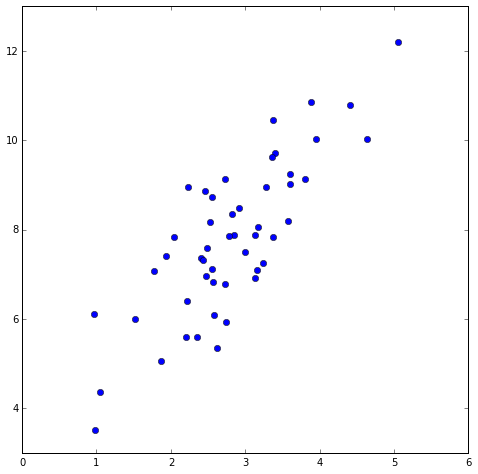

In [42]:
plt.plot(x, y, 'o');

#### Provided we claim to know the scatter perfectly(!), the likelihood function is both simple and familiar:
$\ln L = \sum_i -\frac{1}{2}\left(a+b x_i - y_i\right)^2$ + constant

#### On Tuesday, you saw that this problem has an exact solution if we take uniform, improper priors, namely the classical Ordinary Least Squares solution. In (matrix) equations,
$\left(\begin{array}{c}a\\b\end{array}\right) \sim \mathrm{Normal}\left[\left(X^\mathrm{T}X\right)^{-1}X^\mathrm{T}y, \left(X^\mathrm{T}X\right)^{-1}\right]$, where $X = \left(1 ~~ x\right)$.

#### Let's spell this out in code, although note that direct inversion as done below is *NOT* the most numerically stable/preferable way to evaluate these expressions in the real world, but it will do for our purposes. First, we define $X$ and $y$ as matrices of the appropriate shape.

In [68]:
X = np.matrix(np.vstack([np.ones(len(x)), x]).T)
Y = np.matrix(y).T

#### Now evaluate the mean of the distribution above:

In [67]:
np.linalg.inv(X.T*X)*X.T*Y

matrix([[ 3.14488706],
        [ 1.65315013]])

#### Compare to the built-in `numpy` least squares result:

In [59]:
np.linalg.lstsq(X, y)[0]

array([ 3.14488706,  1.65315013])

#### We also care about the posterior covariance of $a$ and $b$:

In [69]:
np.linalg.inv(X.T*X)

matrix([[ 0.24229537, -0.07911928],
        [-0.07911928,  0.0281601 ]])

#### With these tools in hand, we now have an exact solution to compare to our MCMC algorithms, to make sure that they're working properly!